In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [3]:
## Reading the files

train_data_set = pd.read_csv("Training_Set",sep = ",")

In [4]:
print(train_data_set.head(5))
print(train_data_set.shape) # 7377418, 25
print(train_data_set.columns)

   Unnamed: 0                                          msno  \
0           0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1           1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2           2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3           3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4           4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  song_length genre_ids  \
0              Explore  online-playlist       1       206471       359   
1  Local playlist more   local-playlist       1       2845

## Checking for Null values

In [5]:
print(train_data_set.isnull().values.any())

True


#### Finding all column names that are having null

In [6]:
print(train_data_set.columns[train_data_set.isnull().any()].tolist(), '\\n')

['source_system_tab', 'source_screen_name', 'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'gender', 'song_year'] \n


In [21]:
print("distinct songs",train_data_set['song_id'].nunique())

distinct songs 359966


#### There are around 359966 song information provided in the Data Set

In [22]:
print("distinct users",train_data_set['msno'].nunique())

distinct users 30755


#### There were around 30755 users in the data set. So it can be said that there were a lot of songs that were being listened multiple times

In [23]:
print("distinct Artists",train_data_set['artist_name'].nunique())

distinct Artists 40582


In [24]:
print("distinct Languages",train_data_set['language'].nunique())

distinct Languages 10


In [25]:
print("distinct Genre",train_data_set['genre_ids'].nunique())

distinct Genre 572


#### Plot to show the target value count 

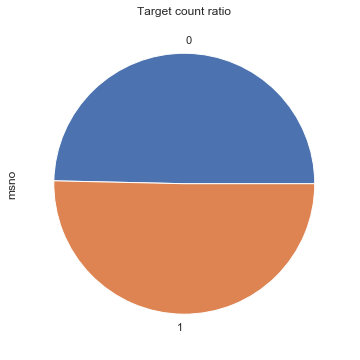

In [8]:
target_count = train_data_set.groupby('target')['msno'].count()
f1 = plt.figure()
target_count.plot.pie(figsize=(6, 6))
plt.title('Target count ratio')
plt.show()
f1.savefig("Target count ratio.pdf", bbox_inches='tight')

#### Variation of the target count based on Source_systems_tab

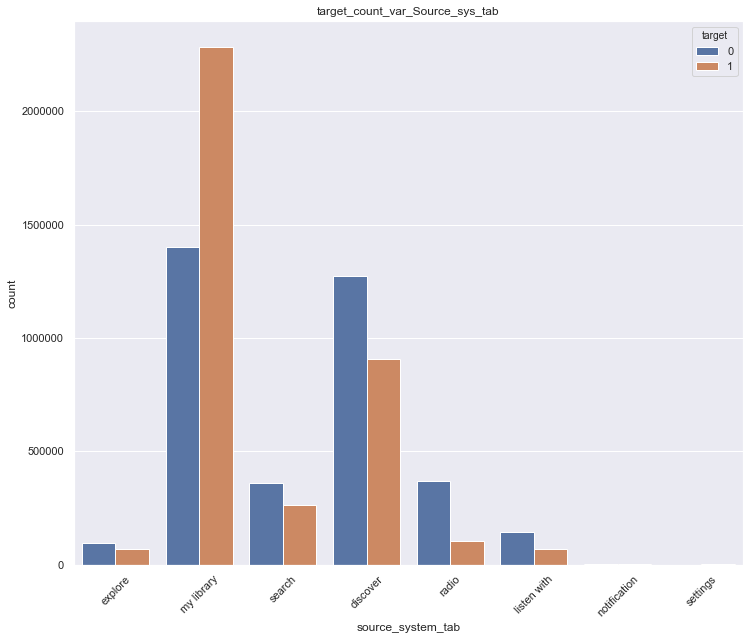

In [10]:
sns.set()
f2 = plt.figure(figsize=(12,10))
g1 = sns.countplot(train_data_set['source_system_tab'],hue=train_data_set['target'])
locs, labels = plt.xticks()
plt.title("target_count_var_Source_sys_tab")
g1.set_xticklabels(labels,rotation=45)
f2.savefig("target_count_var_Source_sys_tab.pdf", bbox_inches='tight')

#### Variation based on source_screen_name

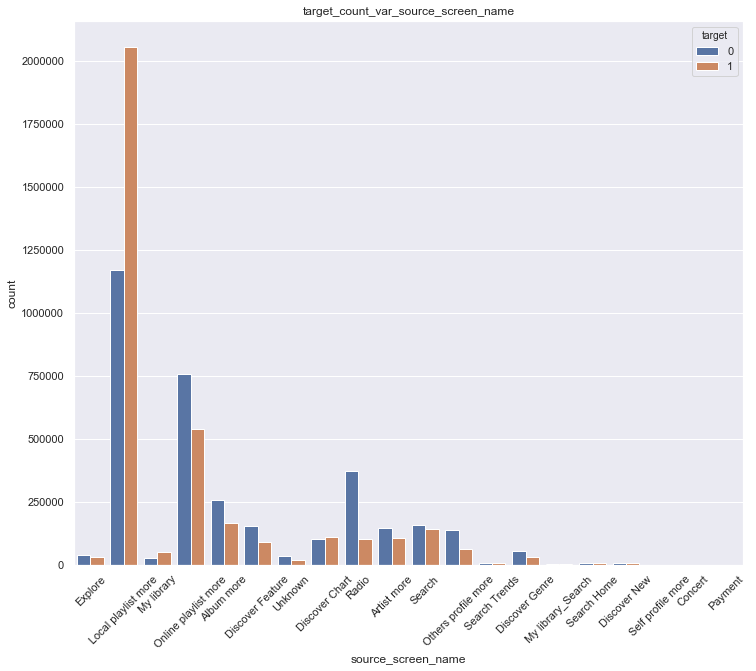

In [11]:
f3 = plt.figure(figsize=(12,10))
g2 = sns.countplot(train_data_set['source_screen_name'],hue=train_data_set['target'])
locs, labels = plt.xticks()
plt.title("target_count_var_source_screen_name")
g2.set_xticklabels(labels,rotation=45)
f3.savefig("target_count_var_source_screen_name.pdf", bbox_inches='tight')

#### Variation based on Source_Type

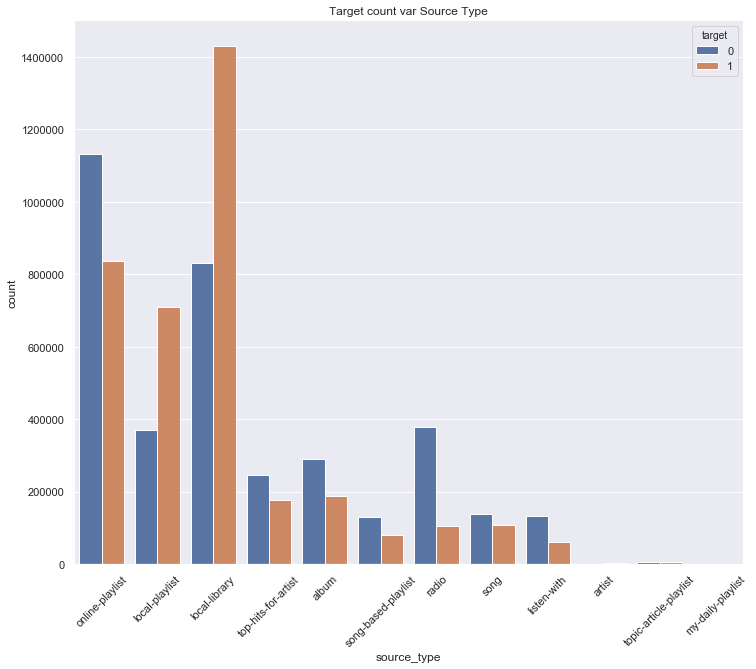

In [12]:
f4 = plt.figure(figsize=(12,10))
g3 = sns.countplot(train_data_set['source_type'],hue=train_data_set['target'])
locs, labels = plt.xticks()
plt.title("Target count var Source Type")
g3.set_xticklabels(labels,rotation=45)
f4.savefig("Target count var Source Type.pdf", bbox_inches='tight')

#### Variation of songs listened to based on age

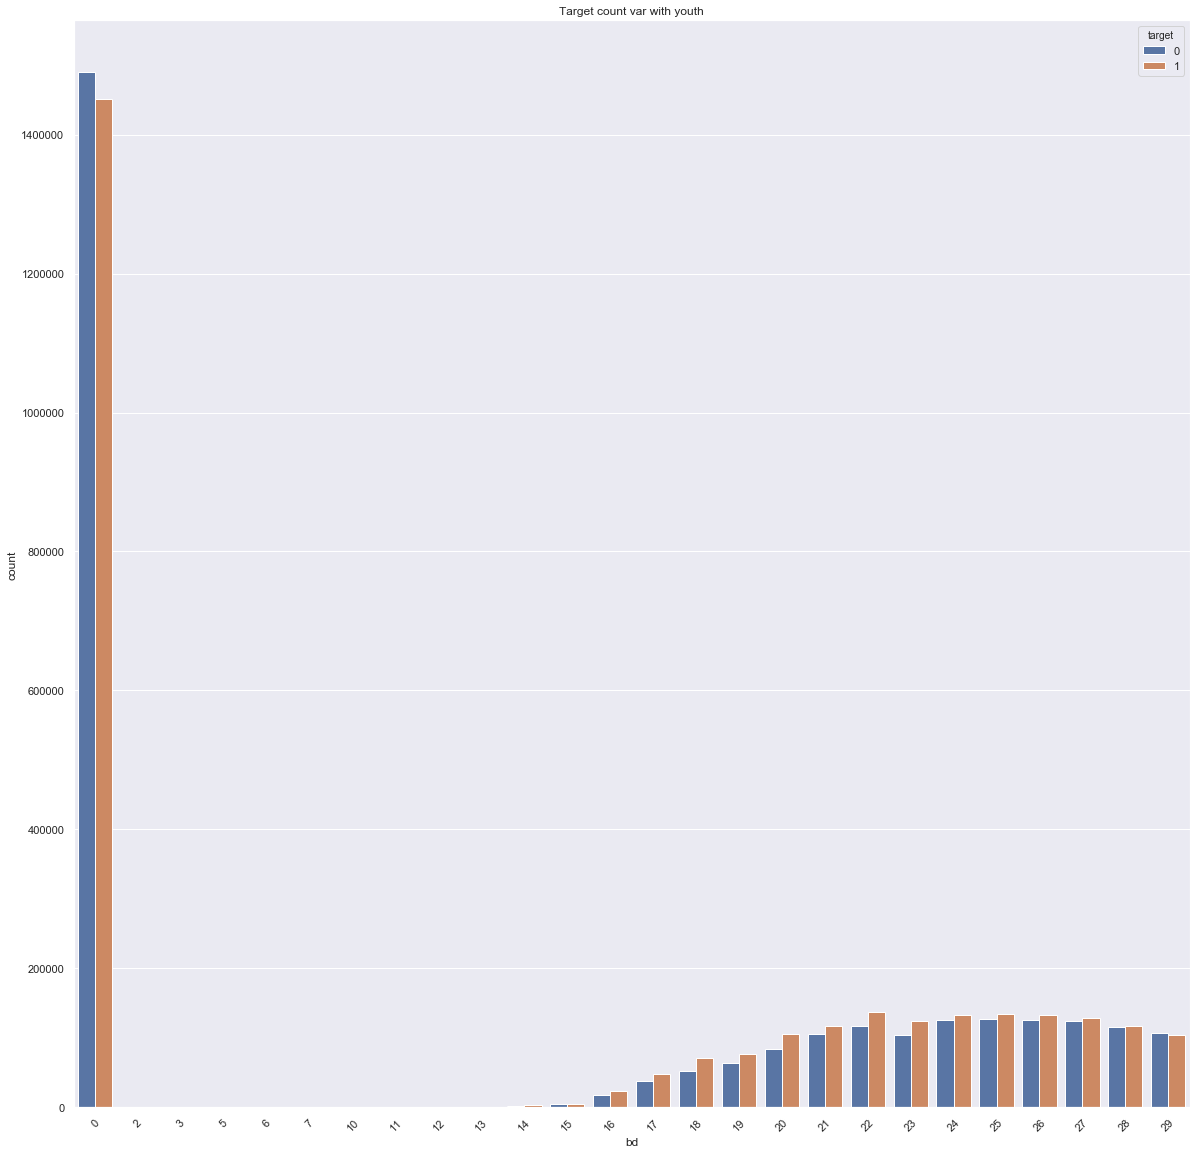

In [13]:
## Youth
train_data_youth_songs = train_data_set.query("bd < 30")
f5 = plt.figure(figsize=(20,20))
g4 = sns.countplot(train_data_youth_songs['bd'],hue=train_data_youth_songs['target'])
locs, labels = plt.xticks()
plt.title("Target count var with youth")
g4.set_xticklabels(labels,rotation=45)
f5.savefig("Target count var with youth.pdf", bbox_inches='tight')

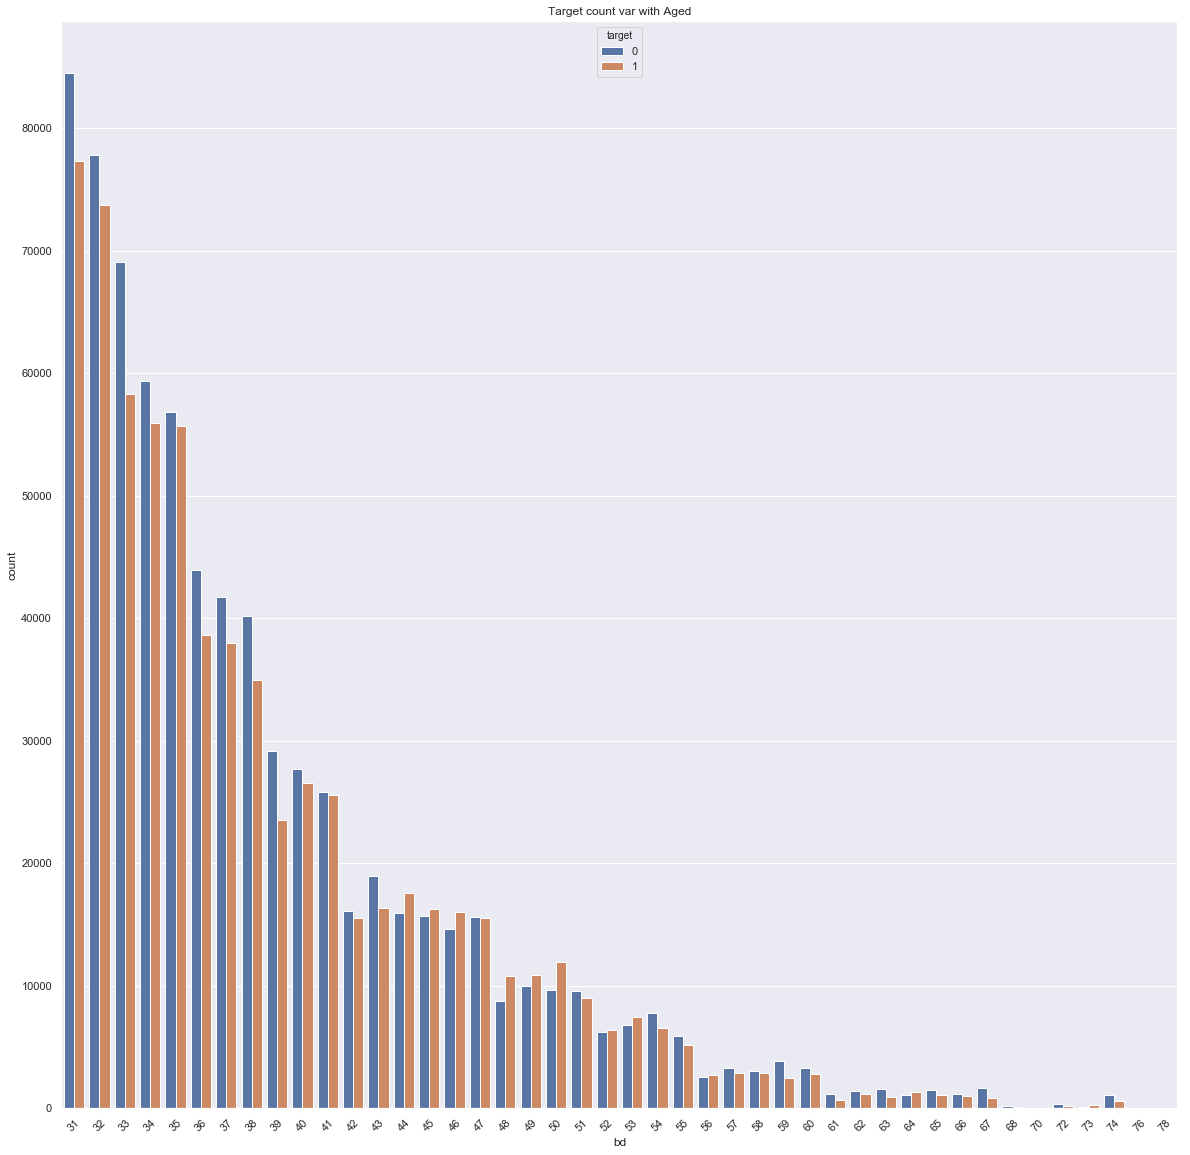

In [14]:
## Aged
train_data_aged_songs = train_data_set.query("80 > bd > 30 ")
f6 = plt.figure(figsize=(20,20))
g5 = sns.countplot(train_data_aged_songs['bd'],hue=train_data_aged_songs['target'])
locs, labels = plt.xticks()
plt.title("Target count var with Aged")
g5.set_xticklabels(labels,rotation=45)
f6.savefig("Target count var with Aged.pdf", bbox_inches='tight')

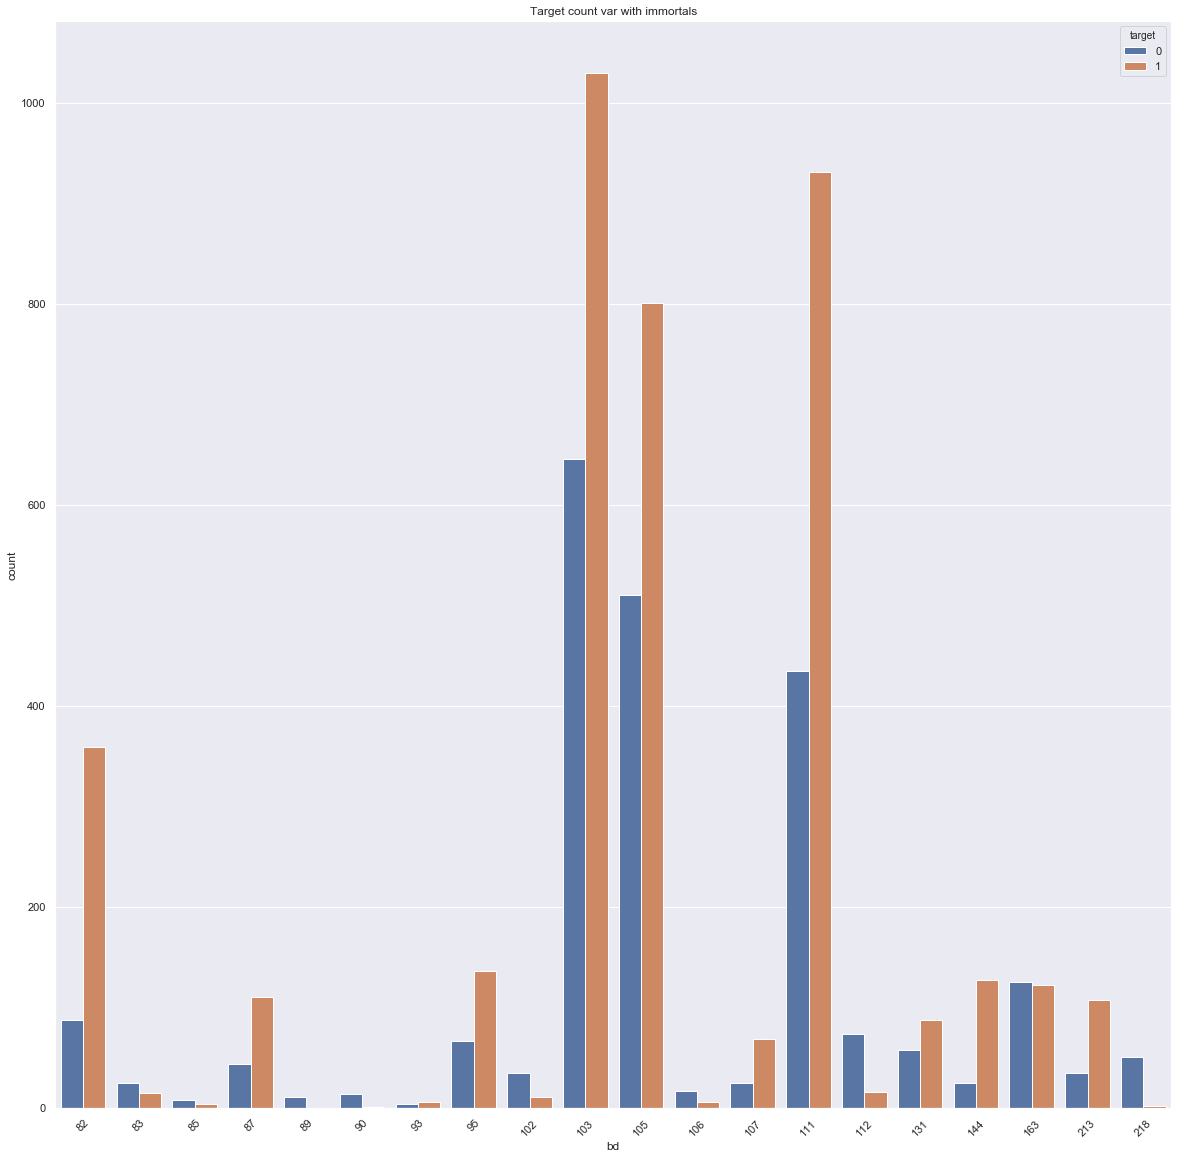

In [15]:
## Immortals
train_data_immortals_songs = train_data_set.query("80 < bd")
f7 = plt.figure(figsize=(20,20))
g6 = sns.countplot(train_data_immortals_songs['bd'],hue=train_data_immortals_songs['target'])
locs, labels = plt.xticks()
plt.title("Target count var with immortals")
g6.set_xticklabels(labels,rotation=45)
f7.savefig("Target count var with immortals.pdf", bbox_inches='tight')

#### We will need to check for the outliers due to age

In [54]:
len(train_data_set.query("bd ==  0"))

2940499

In [56]:
len(train_data_set.query("bd > 100"))

5346

#### Variation with respect to song year

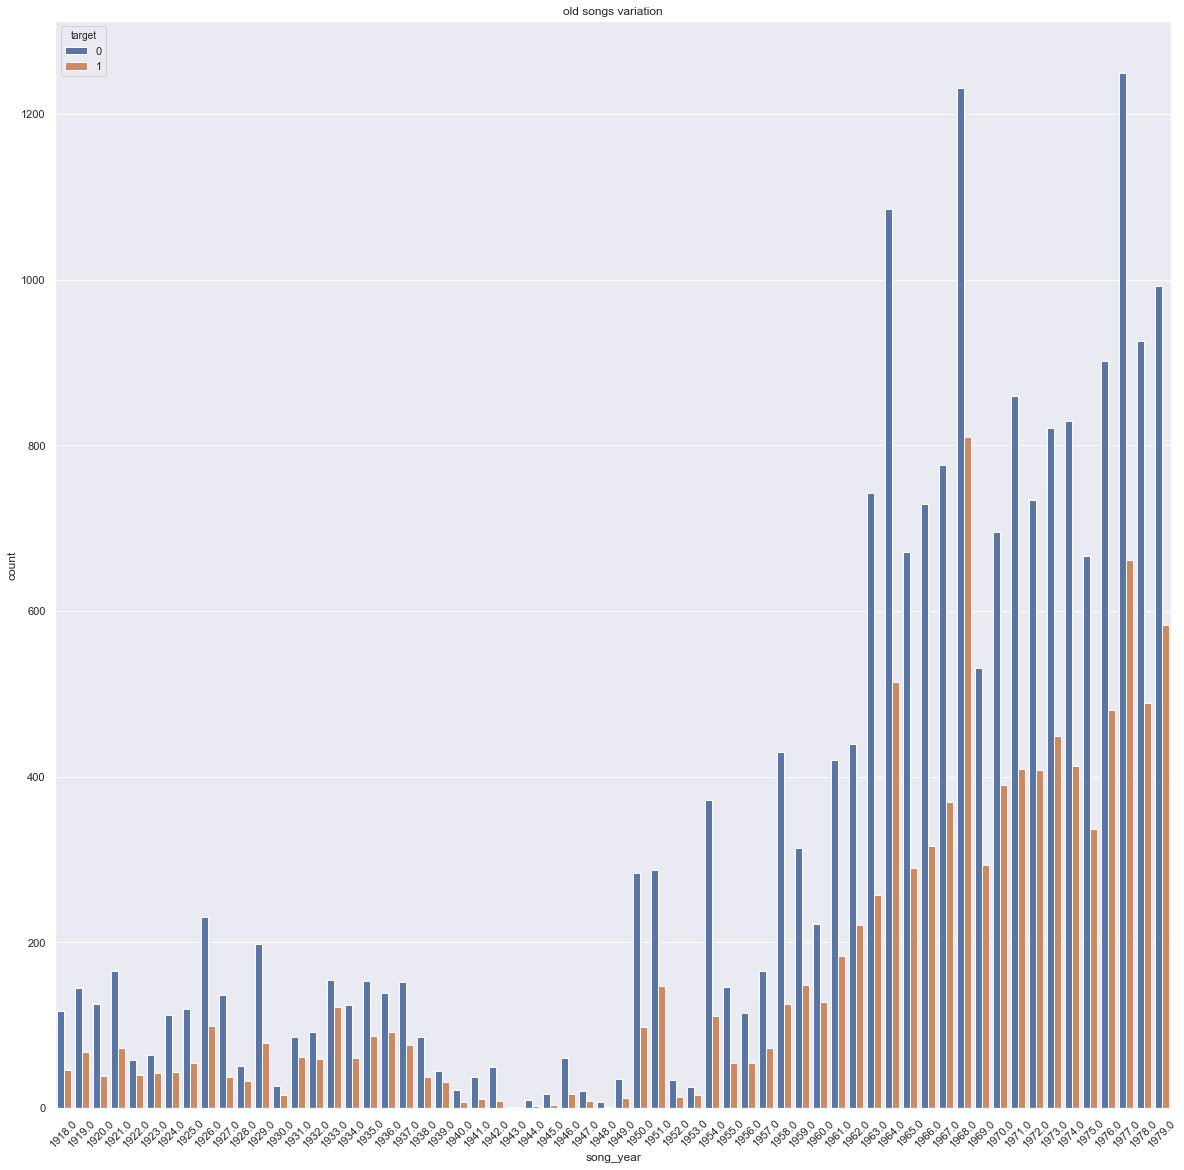

In [17]:
## old songs
train_data_old_songs = train_data_set.query("song_year < 1980")
f8 = plt.figure(figsize=(20,20))
g7 = sns.countplot(train_data_old_songs['song_year'],hue=train_data_old_songs['target'])
locs, labels = plt.xticks()
plt.title("old songs variation")
g7.set_xticklabels(labels,rotation=45)
f8.savefig("Target count variation with respect to old songs.pdf", bbox_inches='tight')

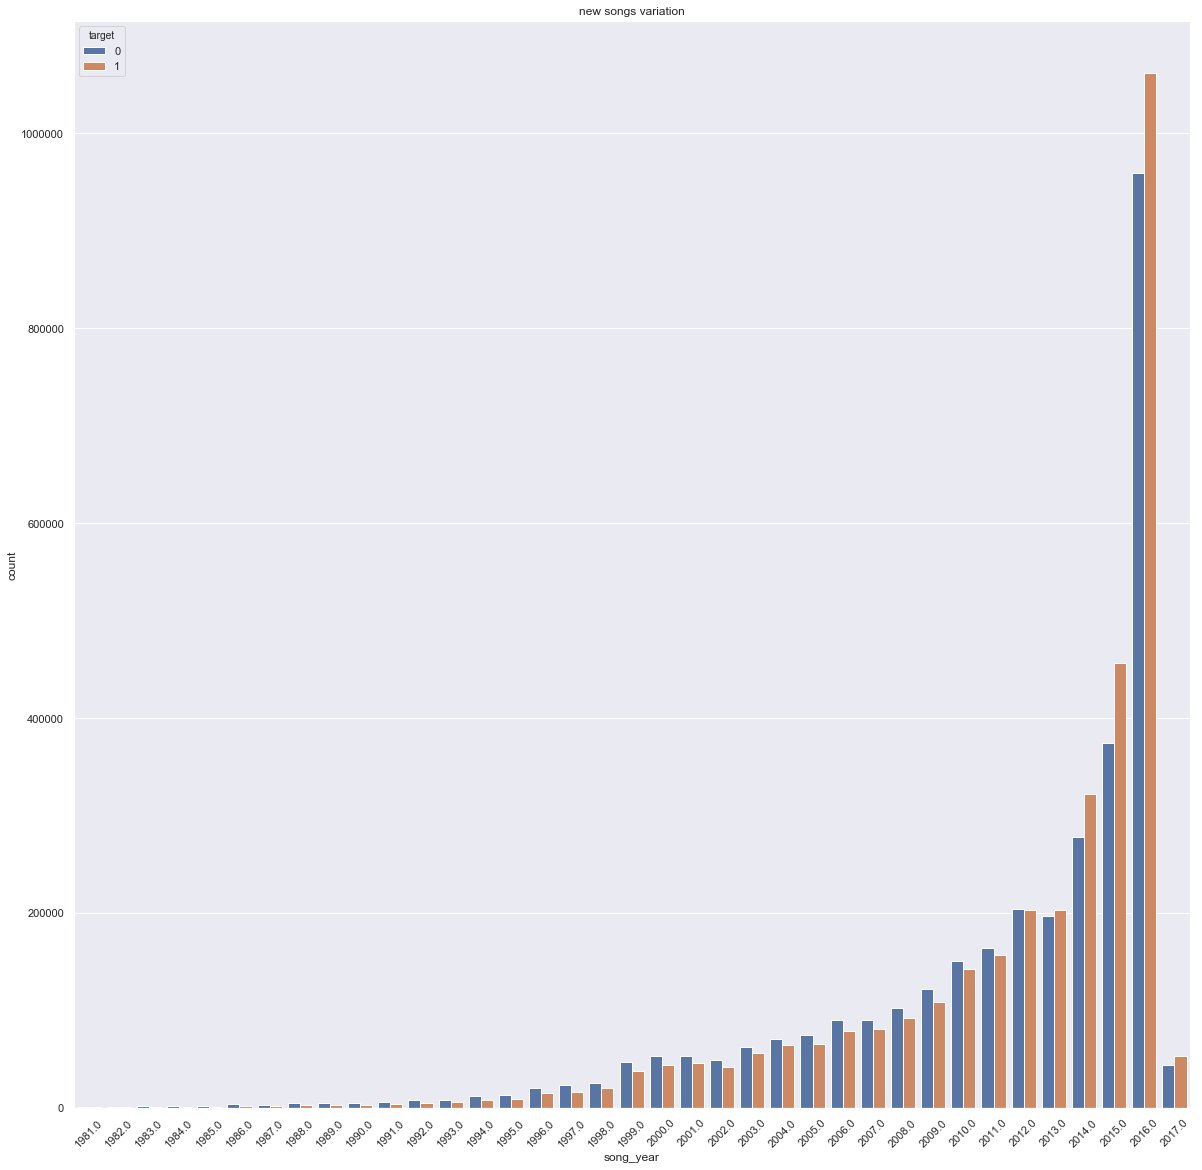

In [18]:
## new songs
train_data_new_songs = train_data_set.query("song_year > 1980")
f9 = plt.figure(figsize=(20,20))
g8 = sns.countplot(train_data_new_songs['song_year'],hue=train_data_new_songs['target'])
locs, labels = plt.xticks()
plt.title("new songs variation")
g8.set_xticklabels(labels,rotation=45)
f9.savefig("Target count variation with New songs.pdf", bbox_inches='tight')

#### gender ratio

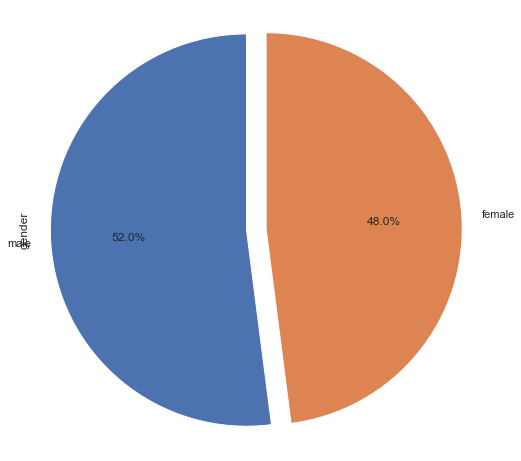

In [20]:
f11 = plt.figure(figsize = (8, 8))
pp = pd.value_counts(train_data_set.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.axis('equal')
plt.show()
f11.savefig("Gender Ratio in data set.pdf", bbox_inches='tight')

#### Variation of target count with gender

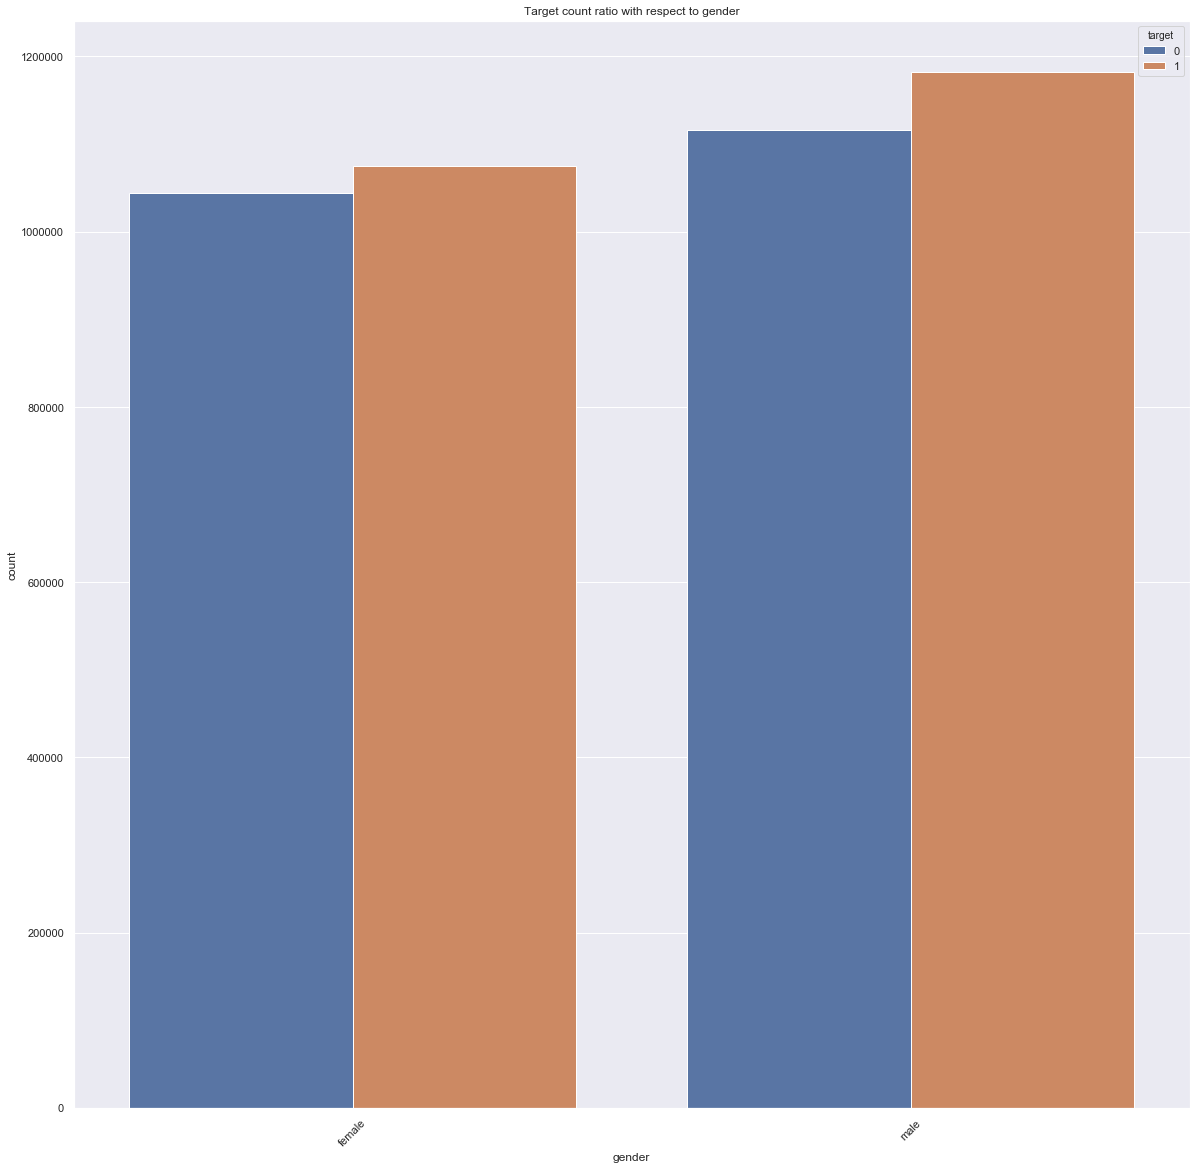

In [21]:
f12 = plt.figure(figsize=(20,20))
g10 = sns.countplot(train_data_set['gender'],hue=train_data_set['target'])
locs, labels = plt.xticks()
plt.title("Target count ratio with respect to gender")
g10.set_xticklabels(labels,rotation=45)
f12.savefig("Target count variation with respect to gender.pdf", bbox_inches='tight')

## Analysis on the songs

In [31]:
song_analysis = train_data_set[['song_id', 'target']].groupby(['song_id']).agg(['mean','count'])
song_analysis.reset_index(inplace=True)
song_analysis.columns = list(map(''.join, listen_log_groupby.columns.values))

song_analysis.columns = ['song_id', 'mean', 'count']  #rename columns

song_analysis_data = song_analysis.merge(train_data_set, on='song_id') # merge song data with computed values

song_analysis_data['mean_count'] = song_analysis_data['mean'] * song_analysis_data['count']
## Basically multiplying the means with the count 
#print(Song_analysis_data)

#### We will now check if the songs popularity affects it being played repeatatively

In [32]:
no_of_repeats = []
chance_of_repeat = []

for i in range(1,song_analysis_data['count'].max()+1):
    repeats_i = song_analysis_data[song_analysis_data['count']==i]
    count = repeats_i['count'].sum()
    if count > 0:
        no_of_repeats.append(i)
        chance_of_repeat.append(repeats_i['mean_count'].sum() / count)

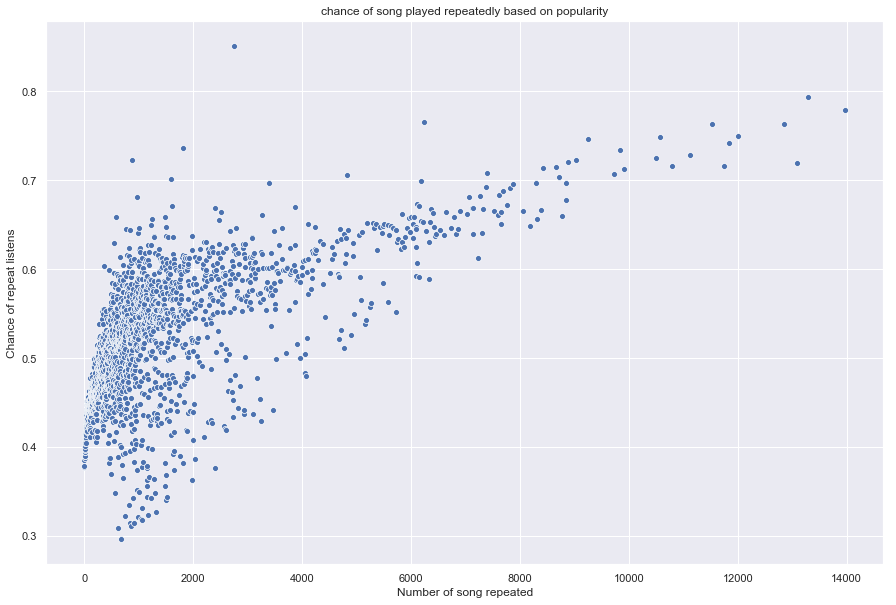

In [35]:
f13= plt.figure(figsize=(15,10))
plt.xlabel('Number of song repeated')
plt.ylabel('Chance of repeat listens')
sns.scatterplot(no_of_repeats, chance_of_repeat)
plt.title("chance of song played repeatedly based on popularity")
f12.savefig("chance of song played repeatedly based on popularity.pdf", bbox_inches='tight')

#### From the graph it can be observed that there is somesort of correlation

In [36]:
def count_vals(x):
    # count number of values (since we can have mutliple values separated by '|')
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [37]:
# count number of genres, composers, lyricsts
song_analysis_data['number_of_genres'] = song_analysis_data['genre_ids'].apply(count_vals)
song_analysis_data['number_of_composers'] = song_analysis_data['composer'].apply(count_vals)
song_analysis_data['number_of_lyricists'] = song_analysis_data['lyricist'].apply(count_vals)

#### Variation based on laguage

In [50]:
languages = song_analysis_data['language'].unique()


language_count = []
language_no_of_repeats = []
language_chance_of_repeat = []
   
    
for l in languages:
    if not np.isnan(l):
        songs_language = song_analysis_data[song_analysis_data['language']==l]
        count = songs_language['count'].sum()
        language_chance_of_repeat.append(songs_language['mean_count'].sum() / count)
        language_count.append(songs_language.shape[0])
        language_no_of_repeats.append(count)
    else:
        songs_language = song_analysis_data[pd.isnull(song_analysis_data['language'])]
        count = songs_language['count'].sum()
        language_chance_of_repeat.append(songs_language['mean_count'].sum() / count)
        language_count.append(songs_language.shape[0])
        language_no_of_repeats.append(count)
languages[9] = -100

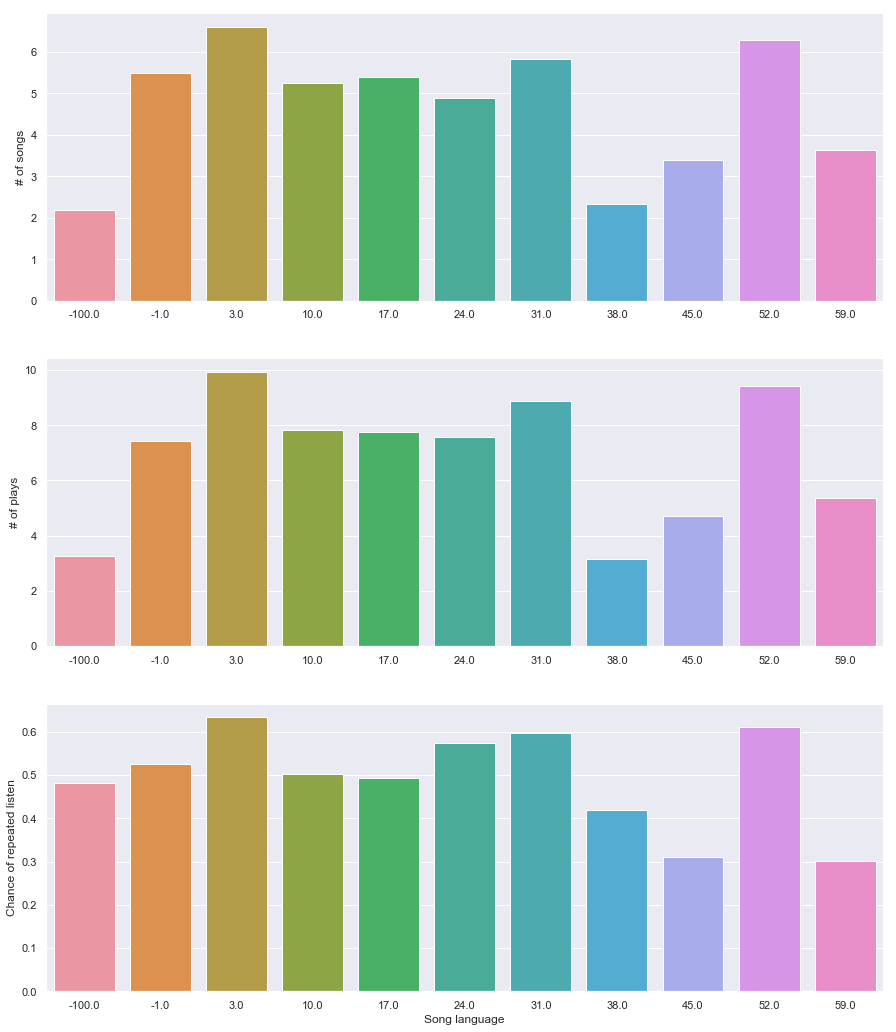

In [51]:
f10 = plt.figure(figsize=(15, 18)) 
plt.title("Target count variation with language")
ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('# of songs')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_no_of_repeats))
ax2.set_ylabel('# of plays')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_chance_of_repeat)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')
f10.savefig("Songs variation with language.pdf", bbox_inches='tight')

#### Language does not show much relation with the chance of repeated play

#### Now lets play with song length

In [52]:
shortest_song = song_analysis_data.iloc[song_analysis_data['song_length'].idxmin()]
longest_song = song_analysis_data.iloc[song_analysis_data['song_length'].idxmax()]
print(shortest_song, '\n')
print(longest_song)

song_id                0+IKWbYVq0Ee/5zcDU9z4SlBQmJfX7TvW98c84KEGS8=
mean                                                              1
count                                                             1
Unnamed: 0                                                  2402664
msno                   IzwyWtpWIhg0MYPp34+xu8fAA14WrzQNhLb0glUArzY=
source_system_tab                                        my library
source_screen_name                                       Album more
source_type                                                   album
target                                                            1
song_length                                                    1393
genre_ids                                                       691
artist_name                                         Trisha Yearwood
composer                              Robert E. Irving| Kevin Quinn
lyricist                                                        NaN
language                                        